In [12]:
import time
import sys
sys.path.append('../')
from  librairies.manipbase import *
from librairies.bt import *
from matplotlib import pyplot as plt

Importing Librairies...


In [122]:
%%time
x = 'EUR/USD'
_period = 'H4'
_year_bottom = pd.to_datetime('2015-01-01 16:00:00')
_year_top = pd.to_datetime('2019-01-31 16:00:00')

base,df = baseimport(x,_period,_year_bottom,_year_top)

Base chargée

Borne inférieure de la base: 2010-11-24 00:00:00 , Borne supérieure : 2020-11-24 16:00:00

Base réduite à df, ayant pour shape : (6202, 12)

Borne inférieure de df: 2015-01-02 04:00:00 , Borne supérieure de df: 2019-01-31 16:00:00

CPU times: user 44 ms, sys: 6.83 ms, total: 50.8 ms
Wall time: 50.2 ms


In [123]:
df.shape

(6202, 12)

In [124]:
df = rsi(df,2)
df['ROLLO'] = df.Low.rolling(10).min()
df['ROLHI'] = df.High.rolling(10).max()

In [125]:
df['Signal'] = np.where(((df.RSI_2<=10) & (df.Close - df.ROLLO<=0.008)),1,np.where(((df.RSI_2>=90) & (df.ROLHI - df.Close <= 0.008)),-1,0))

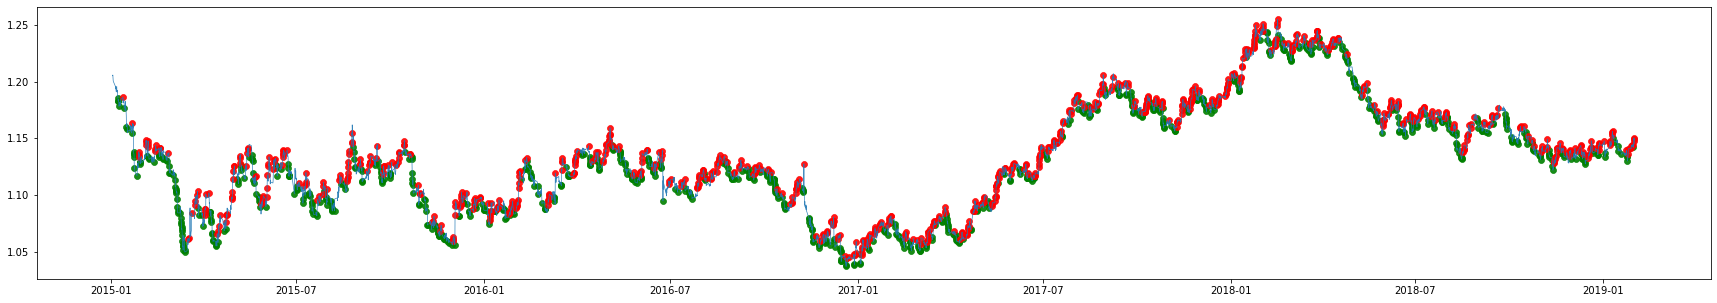

In [126]:
plt.figure(figsize=(30,5))
plt.plot(df.Close,alpha=0.9,linewidth=0.7,label='Close')
plt.scatter(df[df.Signal==1].index,df[df.Signal==1].Close,alpha=0.9,linewidth=0.7,label='Buy',color='green')
plt.scatter(df[df.Signal==-1].index,df[df.Signal==-1].Close,alpha=0.9,linewidth=0.7,label='Sell',color='red')
#plt.plot(df.MMA_55)

In [127]:
%%time
_nb_bougie_exit = 1000
_trigger_reengage = 0
_trigger_target = 1
_trigger_invers = 0
_trigger_sl = 1
_verbose = 0
_cash_ini = 200000
_rate = 1
x = 'EUR/USD'
_target = 0.004
_exposure = 3
_size = 50000
_sl = 0.009
TRACKER = bt(df,_year_bottom,_year_top,_nb_bougie_exit,_trigger_reengage,_trigger_target,_trigger_invers,_trigger_sl,_verbose,_cash_ini,\
        _rate,x,_target,_exposure,_size,_sl)

Librairies imported

Début des opérations horodatée à 2020-12-25 14:32:55.044930

Chargement de la nouvelle base


 Le rate du ticker EUR/USD est à  1 
Bases chargées
TETEL process effectué
 ENTERING THE BACKTEST 
100%|██████████| 6193/6193 [00:00<00:00, 14837.05it/s]
 Pour le ticker  EUR/USD 
 
Les gains faramineux s'élèvent à : $  6116.0 !. En  319   transactions.
 
Nbre de winners : 213 
 
Nbre de loosers : 106 
Temps d'excution du BT 0:00:06.646267
 EUR/USD  results 
 Tested Period 2015-01-01 16:00:00  à 2019-01-31 16:00:00 
 Total Number of trades 319 
Started Cash : 50000
P&L  in currency:  6116.0$ 
P&L in %:  3.06% 
Average trade duration 15.16
# Winners  213.0
# Loosers  106.0
Cumulated gains 71126.0
Cumulated losses -65010.0
 PROFIT FACTOR :  1.09 
 Winners Ratio : 66.77 % 
Average Winners 333.92
% Average Winners 0.17
Average Loosers -613.3
% Average Loosers -0.31
Average pnl 19.17
% Average pnl 0.01
Number of opened trades 319
Number of closed trades 319
Max Exposure 1 x  50